<a href="https://colab.research.google.com/github/Megha7732/CustomerSegmentation/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
cdata=pd.read_excel("Online Retail.xlsx",engine='openpyxl')

<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#85e0e0;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Customer Segmentation (Clustering) 🛍️🛒</h1></center>    

</div>

<p align="center">
  <img width="750" height="300" src="https://blog.intercomassets.com/blog/wp-content/uploads/2020/10/Customer-segmentation-performance-matrix.png">
</p>

**Table of Contents:**


*   Problem Statement
*   Data Features

*   Data Preparation
*   Handling Missing Values

*   Handling Duplicates
*   Outliers Removal

*   Feature Engineering



*   Standard Scaling


*   Elbow method for optimal clusters

*   K-means Clustering


*   Interpretations and Findings
















**Problem Statement:** Segment customers based on purchasing behavior to identify marketing strategies for different groups.

**Data Features**


*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
*  StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.

*   InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*   UnitPrice: Unit price. Numeric, Product price per unit in sterling.

*   CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal, the name of the country where each customer resides.

















**Data Preparation**

In [ ]:
cdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
cdata.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
cdata.shape

(541909, 8)

In [ ]:
cdata.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
column_types = pd.DataFrame(cdata.dtypes).T.rename(index={0: 'Column Type'})

In [ ]:
null_counts = pd.DataFrame(cdata.isnull().sum()).T.rename(index={0: 'Null Values (Count)'})

In [ ]:
null_percentage = pd.DataFrame(cdata.isnull().sum() / len(cdata) * 100).T.rename(index={0: 'Null Values (%)'})

In [ ]:
tab_info = pd.concat([column_types, null_counts, null_percentage])

In [ ]:
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,datetime64[ns],float64,float64,object
Null Values (Count),0,0,1454,0,0,0,135080,0
Null Values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


**Handling Missing Values**

In [ ]:
import missingno as msno

<Axes: >

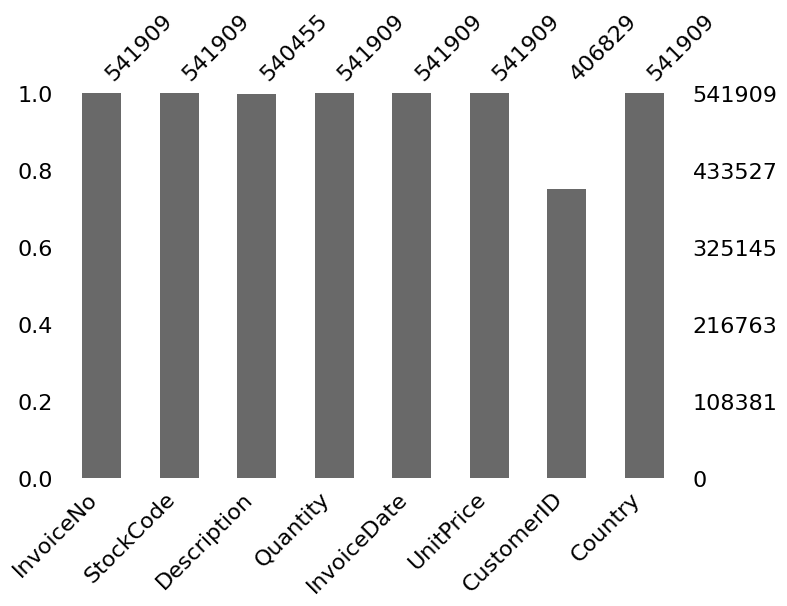

In [ ]:
msno.bar(cdata,figsize=(8,5))

<Axes: >

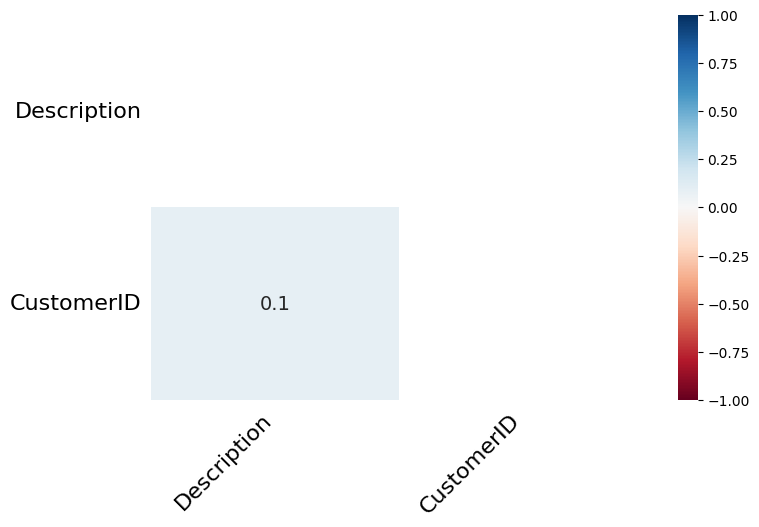

In [ ]:
msno.heatmap(cdata,figsize=(8,5))

Here both the missing columns have least correlation impact on data set.So even though customer ID has more null values if we remove that it will not cretae much imapct on existing dat set.

In [ ]:
cdata.dropna(subset=['Description'],axis=0, inplace=True)

In [ ]:
cdata.dropna(subset=['CustomerID'],axis=0, inplace=True)

In [ ]:
cdata.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**Handling** **Duplicates**

In [ ]:
duplicated=cdata[cdata.duplicated()]

In [ ]:
print(duplicated)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [ ]:
cdata.drop_duplicates(inplace=True)

In [ ]:
remaining=cdata.duplicated().sum()

In [ ]:
remaining

0

In [ ]:
cdata.shape

(401604, 8)

**Outlier Detection**:We will be working on unit price and quantity columns so lets remove the outliers in those columns.

In [ ]:
Q1_quantity = cdata['Quantity'].quantile(0.25)
Q3_quantity = cdata['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

In [ ]:
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

In [ ]:
Q1_price = cdata['UnitPrice'].quantile(0.25)
Q3_price = cdata['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

In [ ]:
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

In [ ]:
cdata = cdata[
    (cdata['Quantity'] >= lower_bound_quantity) &
    (cdata['Quantity'] <= upper_bound_quantity) &
    (cdata['UnitPrice'] >= lower_bound_price) &
    (cdata['UnitPrice'] <= upper_bound_price)
]

In [ ]:
cdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
cdata.shape

(339453, 8)

**Feature Engineering:**In this step we will try to introduce new columns into the data set which will add new meaning and generate in depth insights.

In [ ]:
cdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Creating New column Total Spending:

In [ ]:
cdata["Total Spending"] = cdata["Quantity"] * cdata["UnitPrice"]

In [ ]:
cdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Spending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
tab_info2=pd.DataFrame({
    'products': [cdata['StockCode'].nunique()],
    'transactions': [cdata['InvoiceNo'].nunique()],
    'customers': [cdata['CustomerID'].nunique()]
}, index=['quantity'])


In [ ]:
tab_info2

,products,transactions,customers
quantity,3415,19480,4222


It can be seen that the data concern 4222 users and that they bought 3415 different products. The total number of transactions carried out is of the order of  ∼
 20'000.

In [ ]:
top_customers = (
    cdata.groupby('CustomerID')['InvoiceNo']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'InvoiceNo': 'Number of Transactions'})
)

In [ ]:
top_customers

,CustomerID,Number of Transactions
0,14911.0,232
1,12748.0,202
2,17841.0,163
3,14606.0,125
4,15311.0,113
5,13089.0,95
6,12971.0,79
7,13408.0,64
8,14527.0,55
9,13767.0,51


**Exploring Product Categories**

In [ ]:
cdata["Description"].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1706
JUMBO BAG RED RETROSPOT,1363
PARTY BUNTING,1283
LUNCH BAG RED RETROSPOT,1232
SET OF 3 CAKE TINS PANTRY DESIGN,1183
...,...
RED ROSE AND LACE C/COVER,1
SMALL DECO JEWELLERY STAND,1
WHITE CHERRY LIGHTS,1


In [ ]:
cdata['ProductName'] = cdata['Description'].str.split().str[-3:].str.join(" ")

In [ ]:
cdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Spending,ProductName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,HOTTIE WHITE HEART.


In [ ]:
cdata['ProductName'].value_counts()

,count
ProductName,
HOT WATER BOTTLE,5009
HEART T-LIGHT HOLDER,2613
BAG RED RETROSPOT,2595
BAG PINK POLKADOT,2159
TEACUP AND SAUCER,2097
...,...
PAN RED POLKADOT,1
WOOD ANTIQUE WHITE,1
LARGE JEWELED PHOTOFRAME,1


There is no so much difference between product name counts so we can consider

In [ ]:
category_data = cdata.groupby(['CustomerID', 'ProductName']).agg({'Quantity': 'sum'}).reset_index()

In [ ]:
category_data

,CustomerID,ProductName,Quantity
0,12347.0,& CARRY ON,12
1,12347.0,3 LOVE HEART,6
2,12347.0,ANTIQUE IVORY ROSE,16
3,12347.0,ASSORTED COLOUR TEASPOONS,12
4,12347.0,BAG PSYCHEDELIC APPLES,12
...,...,...,...
217359,18287.0,WARMER OWL DESIGN,12
217360,18287.0,WITH HOLLY BELL,24
217361,18287.0,WITH HOLLY BELLS,24
217362,18287.0,WOODEN SLEIGH DECORATIONS,12


In [ ]:
customer_product_matrix = category_data.pivot(index='CustomerID', columns='ProductName', values='Quantity').fillna(0)

In [ ]:
customer_product_matrix

ProductName,"""TEA FOR ONE""",& CARRY ON,& CRYSTAL EARRINGS,& CRYSTAL NECKLACE,& ORANGE WREATH,& PEARL NECKLACE,& PINECONE WREATH,& SAUCER PINK,'N' GROW SET,+ BALL DESIGN,...,XMAS FUN CARD,YELLOW BABUSHKA NOTEBOOK,YELLOW WOODEN DAISY,YELLOW/BLUE RETRO RADIO,YOUR OWN FLOWERS,ZINC GARDEN DECORATIONS,ZINC GLASS CANDLEHOLDER,ZINC HEART DECORATION,ZINC T-LIGHT HOLDER,blue and orange
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Standard Scaling:** We have 2 numeric columns with us Quantity and Price.We standardize the values of both columns in order to visualize the clusters effectively.

In [ ]:
X = cdata[['Quantity', 'UnitPrice']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Elbow Method for Optimal Clusters:**

In [ ]:
inertia = []             #Sum of squared distances from all points to their respective centroids

In [ ]:
k_range = range(1, 11)  # Testing clusters from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

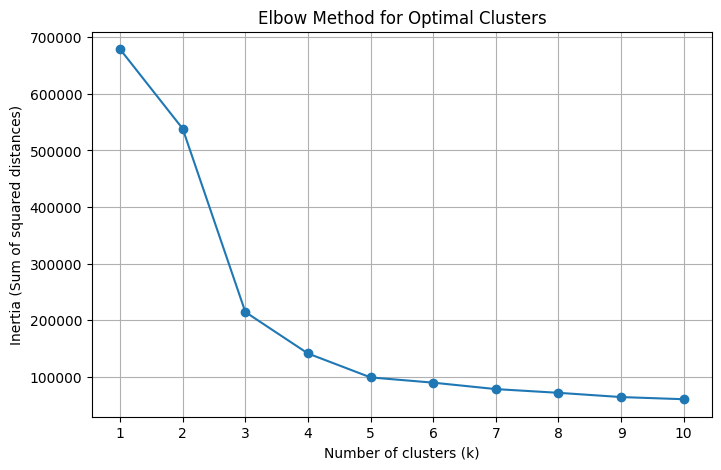

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Here we can find that the optimal number of clusters are **3**

**K-means Clustering**

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
cdata['Cluster'] = clusters

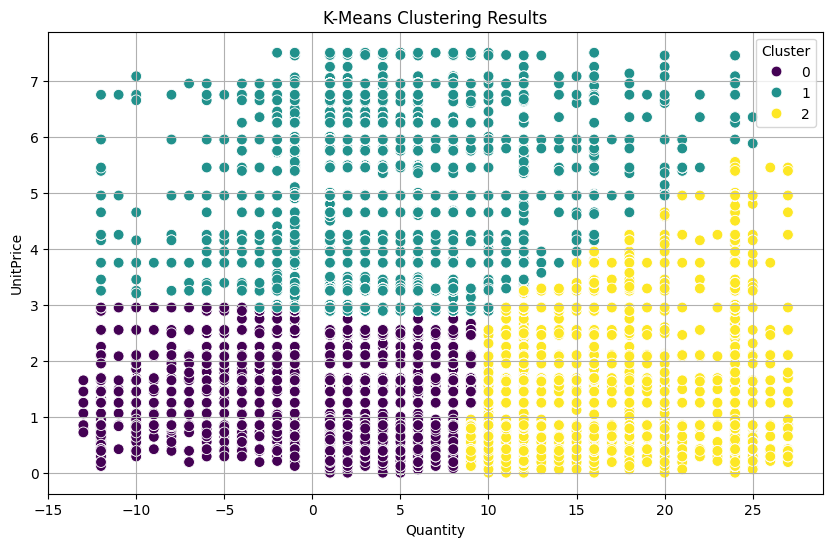

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=cdata, palette='viridis', s=60, marker='o')
plt.title('K-Means Clustering Results')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
print(" Co-ordinates of Cluster Centers (in scaled data):")
print(kmeans.cluster_centers_)
print("\nCluster counts:")
print(cdata['Cluster'].value_counts())

 Co-ordinates of Cluster Centers (in scaled data):
[[-0.63129033 -0.47561783]
 [-0.52835217  1.31812082]
 [ 1.13877464 -0.58702934]]

Cluster counts:
Cluster
0    126863
2    115414
1     97176
Name: count, dtype: int64


In [ ]:
cluster_summary = cdata.groupby('Cluster')[['Quantity', 'UnitPrice']].mean()
print("\nCluster summary statistics:")
print(cluster_summary)


Cluster summary statistics:
          Quantity  UnitPrice
Cluster                      
0         3.000205   1.466407
1         3.709486   4.246117
2        15.196588   1.293755


**Interpretation and Findings:**

*   Cluster 0: Centered at (-0.631, -0.476), suggesting lower Quantity and UnitPrice.

*   Cluster 1: Centered at (1.138, -0.587), indicating higher Quantity but lower UnitPrice.



*   Cluster 2: Centered at (-0.528, 1.318), representing a group with a higher average UnitPrice but moderate Quantity

**Cluster Counts:**


*  Cluster 0: Contains the largest number of data points (126,863), indicating a substantial portion of the data falls within the lower Quantity and UnitPrice range.
*   Cluster 1: Contains 97,176 data points, representing items with higher Quantity but relatively lower UnitPrice.

*   Cluster 2: Contains 115,414 data points, showing items with higher UnitPrice but moderate Quantity.

**Interpretation of Clusters**:


*   Cluster 0: Represents low-quantity, low-price items, likely involving customers making smaller purchases of inexpensive items.The cluster might indicate **Casual or single-item buyers segment**

*   Cluster 1:Represents large-quantity, low-price purchases, potentially reflecting bulk buying of low-cost items. **Bulk Buying Segment**

*   Cluster 2:
Represents moderate/less quantities of higher-priced items, possibly indicating purchases of higher-quality or premium products but in smaller quantities.**Premium customer segment**















**Finding the top 5 products in each cluster**

In [ ]:
cdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Spending,ProductName,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,HEART T-LIGHT HOLDER,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE METAL LANTERN,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,HEARTS COAT HANGER,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,HOT WATER BOTTLE,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,HOTTIE WHITE HEART.,1


In [ ]:
grouped = cdata.groupby(['Cluster', 'ProductName'])['Total Spending'].sum().reset_index()

In [ ]:
top_5_products = (
    grouped.groupby('Cluster', group_keys=False)
          .apply(lambda x: x.nlargest(5, 'Total Spending'))
)

<ipython-input-60-1b3a0b43691c>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Total Spending'))


In [ ]:
print(top_5_products)

      Cluster           ProductName  Total Spending
446         0  COLOUR BIRD ORNAMENT         8032.57
246         0      BOX WITH CUTLERY         7306.20
752         0    FRAME WHITE FINISH         5590.05
8           0         + STICKER SET         4309.80
1916        0     TREASURE BOOK BOX         4309.12
2758        1      HOT WATER BOTTLE        73122.07
2969        1         PARTY BUNTING        32377.35
2315        1   BUILDING BLOCK WORD        30783.80
3317        1    TINS PANTRY DESIGN        26065.47
2721        1  HEART T-LIGHT HOLDER        23881.42
3599        2     BAG RED RETROSPOT        36984.67
3597        2     BAG PINK POLKADOT        23379.32
4521        2      HOT WATER BOTTLE        23097.48
3844        2   CERAMIC DRAWER KNOB        19968.99
4453        2  HEART T-LIGHT HOLDER        18863.84


Drilling drown for country wise customer distribution

In [ ]:
country_cluster_product_count = (
    cdata.groupby(['Country', 'Cluster'])['ProductName']
        .nunique()
        .reset_index()
        .rename(columns={'ProductName': 'ProductCount'})
)

In [ ]:
pivot_table = country_cluster_product_count.pivot(index='Country', columns='Cluster', values='ProductCount').fillna(0)
print(pivot_table)

Cluster                    0       1       2
Country                                     
Australia               59.0   111.0   150.0
Austria                 42.0    74.0   142.0
Bahrain                  1.0     5.0     2.0
Belgium                103.0   201.0   385.0
Brazil                   0.0     9.0    13.0
Canada                  16.0    24.0    75.0
Channel Islands         35.0    94.0   194.0
Cyprus                  86.0   145.0   152.0
Czech Republic           0.0     3.0    16.0
Denmark                 16.0    37.0   159.0
EIRE                   351.0   467.0   962.0
European Community       0.0    20.0    18.0
Finland                 50.0   111.0   216.0
France                 411.0   351.0   766.0
Germany                392.0   392.0   895.0
Greece                  12.0    44.0    57.0
Iceland                  8.0    28.0    53.0
Israel                  24.0    36.0    98.0
Italy                   64.0   109.0   212.0
Japan                   61.0    26.0    34.0
Lebanon   

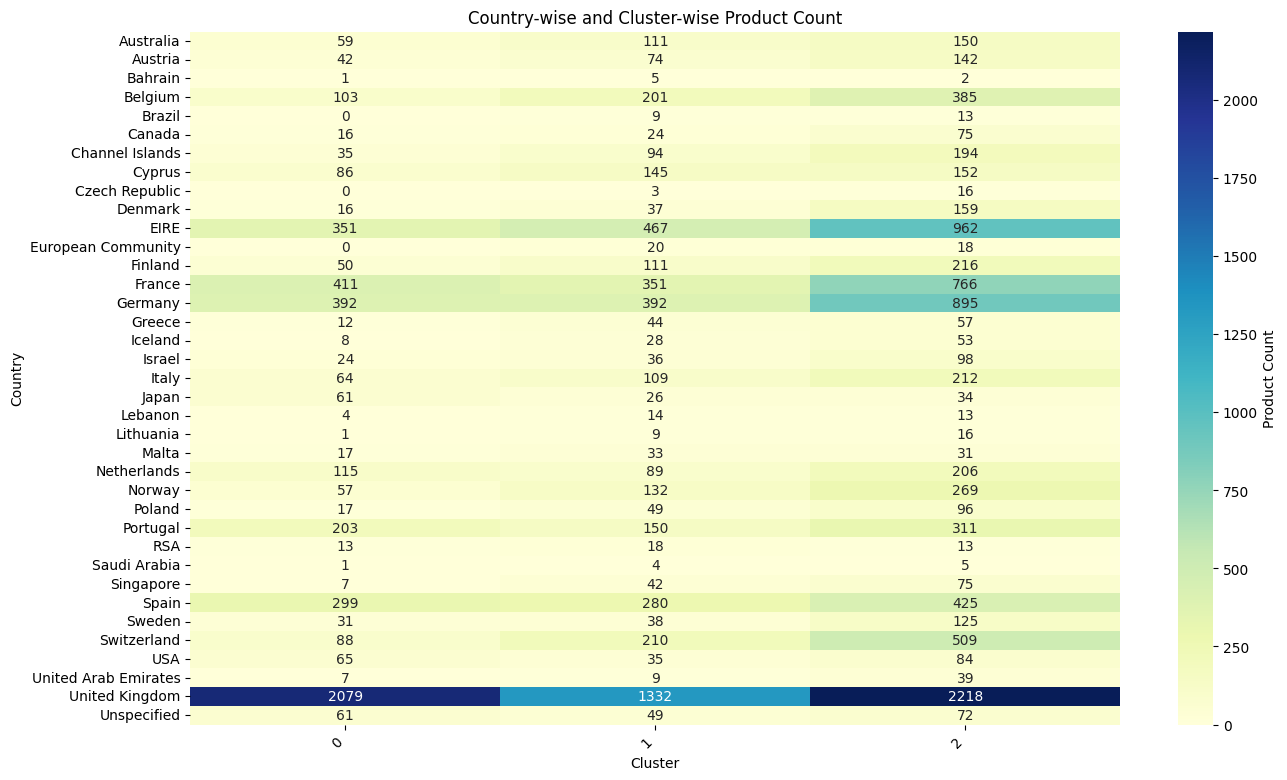

In [ ]:
plt.figure(figsize=(15, 9))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g',cbar_kws={'label': 'Product Count'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Country-wise and Cluster-wise Product Count")
plt.xlabel("Cluster")
plt.ylabel("Country")
plt.show()

# **Trying with another K Value**

In [ ]:
new_k = 5
kmeans = KMeans(n_clusters=new_k, random_state=42)
clusters1 = kmeans.fit_predict(X_scaled)

In [ ]:
cdata['Cluster_new'] = clusters1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


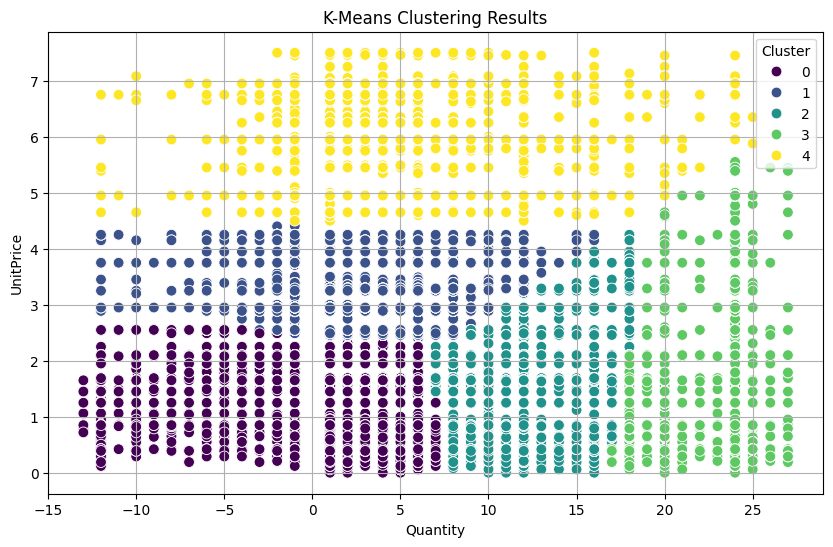

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster_new', data=cdata, palette='viridis', s=60, marker='o')
plt.title('K-Means Clustering Results')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
print(" Co-ordinates of Cluster Centers (in scaled data):")
print(kmeans.cluster_centers_)
print("\nCluster counts:")
print(cdata['Cluster_new'].value_counts())

 Co-ordinates of Cluster Centers (in scaled data):
[[-0.69304331 -0.54615341]
 [-0.52198755  0.73476625]
 [ 0.58843442 -0.52002154]
 [ 2.33676807 -0.74566409]
 [-0.54364808  2.15859403]]

Cluster counts:
Cluster_new
0    107955
2     88963
1     72671
4     35781
3     34083
Name: count, dtype: int64


In [ ]:
cluster_summary1 = cdata.groupby('Cluster_new')[['Quantity', 'UnitPrice']].mean()
print("\nCluster summary statistics:")
print(cluster_summary1)


Cluster summary statistics:
              Quantity  UnitPrice
Cluster_new                      
0             2.581427   1.356937
1             3.753340   3.342108
2            11.412666   1.397868
3            23.451193   1.047923
4             3.604092   5.548576


**Cluster 0:**
Quantity: 2.58 (low)
UnitPrice: 1.36 (low)
Interpretation: These customers buy small quantities of low-priced items. Likely budget-conscious or infrequent buyers.

**Cluster 1:**
Quantity: 3.75 (moderate)
UnitPrice: 3.34 (moderate)

Interpretation: These customers purchase moderate quantities of moderately priced items. Could be occasional buyers of mid-range products.

**Cluster 2:**
Quantity: 11.41 (high)
UnitPrice: 1.39 (low)

Interpretation: These customers buy high quantities of low-priced items. Likely wholesale buyers or price-sensitive bulk purchasers.

**Cluster 3:**
Quantity: 23.45 (very high)
UnitPrice: 1.05 (very low)

Interpretation: These are heavy bulk buyers of very low-priced items. Could represent resellers or highly price-conscious bulk customers.

**Cluster 4:**
Quantity: 3.60 (moderate)
UnitPrice: 5.55 (high)

Interpretation: These customers buy moderate quantities of high-priced items. Likely premium buyers with specific preferences.

Marketing Strategy:

**Cluster 0 & 1:** Target with discounts or promotions for upselling to increase purchase quantities.

**Cluster 2 & 3:** Offer bulk deals and loyalty rewards, as these customers are likely to respond well to volume-based incentives.

**Cluster 4:** Focus on premium branding and exclusive offers to retain these high-value customers.